# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

In [2]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [14]:
APGAR5 = sinasc[['APGAR5', 'SEXO', 'GESTACAO', 'PESO']]
APGAR5

#Eu dimunui os dados do dataframe para melhor visualização.

,APGAR5,SEXO,GESTACAO,PESO
0,10.0,Masculino,37 a 41 semanas,3685
1,9.0,Feminino,37 a 41 semanas,3055
2,10.0,Feminino,37 a 41 semanas,3460
3,10.0,Feminino,37 a 41 semanas,2982
4,10.0,Feminino,37 a 41 semanas,3310
...,...,...,...,...
27023,9.0,Masculino,32 a 36 semanas,2110
27024,9.0,Masculino,37 a 41 semanas,3310
27025,10.0,Masculino,37 a 41 semanas,3065
27026,9.0,Masculino,32 a 36 semanas,2352


In [15]:
for coluna in APGAR5.columns:
    valores_unicos = APGAR5[coluna].unique()
    print(f'Coluna {coluna}: {valores_unicos}')

Coluna APGAR5: [10.  9.  7.  0.  8.  4.  3.  6.  5. nan  2.  1.]
Coluna SEXO: ['Masculino' 'Feminino' nan]
Coluna GESTACAO: ['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']
Coluna PESO: [3685 3055 3460 ... 1340 2564 2352]


In [6]:
APGAR5 = APGAR5.dropna(subset='APGAR5')
for coluna in APGAR5.columns:
    valores_unicos = APGAR5[coluna].unique()
    print(f'Coluna {coluna}: {valores_unicos}')

Coluna APGAR5: [10.  9.  7.  0.  8.  4.  3.  6.  5.  2.  1.]
Coluna SEXO: ['Masculino' 'Feminino' nan]
Coluna GESTACAO: ['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']
Coluna PESO: [3685 3055 3460 ... 1340 2564 2352]


In [7]:
APGAR5['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

In [8]:
def cat_APGAR5(APGAR5):
    if 0 <= APGAR5 <= 3:
        return 'asfixia grave'
    elif 4 <= APGAR5 <= 5:
        return 'asfixia moderada'
    elif 6 <= APGAR5 <= 7:
        return 'asfixia leve'
    else:
        return 'normal'  

APGAR5['APGAR5Cat'] = APGAR5['APGAR5'].apply(cat_APGAR5)
APGAR5['APGAR5'].value_counts()

/tmp/ipykernel_12654/223642884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APGAR5['APGAR5Cat'] = APGAR5['APGAR5'].apply(cat_APGAR5)


9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

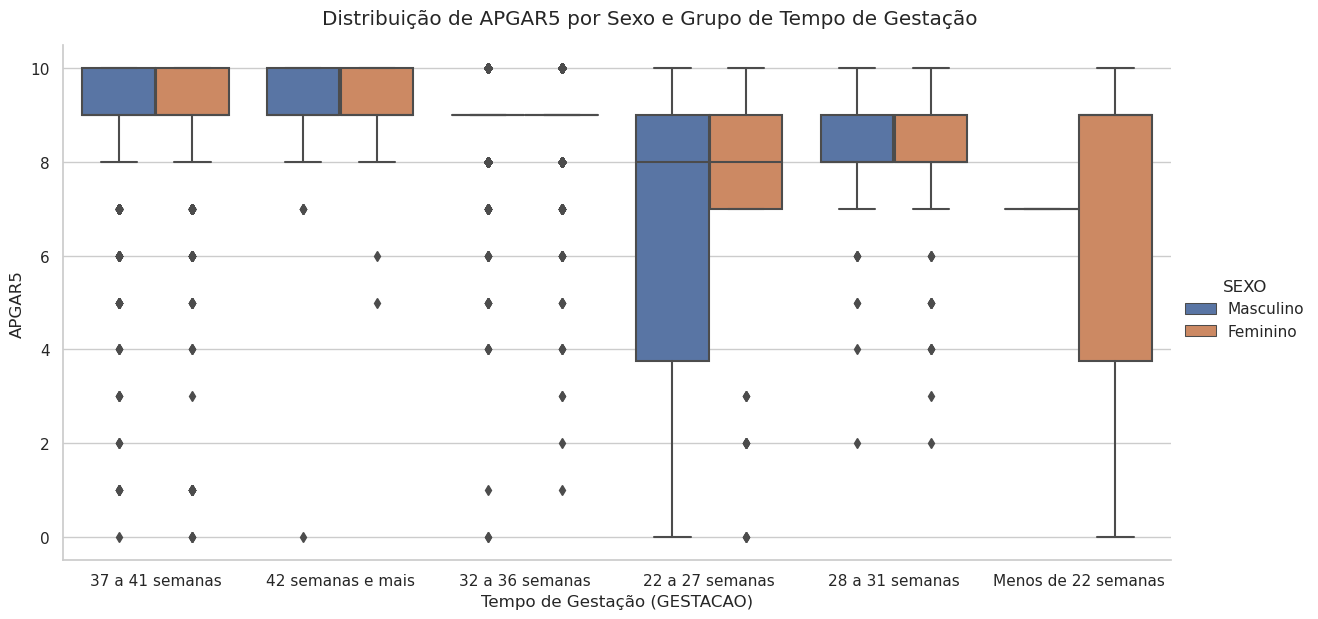

In [9]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=APGAR5,
    x="GESTACAO",
    y="APGAR5",
    hue="SEXO",
    kind="box",
    height=6,
    aspect=2
)

g.fig.suptitle("Distribuição de APGAR5 por Sexo e Grupo de Tempo de Gestação", y=1.03)
g.set_axis_labels("Tempo de Gestação (GESTACAO)", "APGAR5")

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [10]:
tabela_cruzada = pd.crosstab(APGAR5['GESTACAO'], APGAR5['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
percentuais_linha

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424
Menos de 22 semanas,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

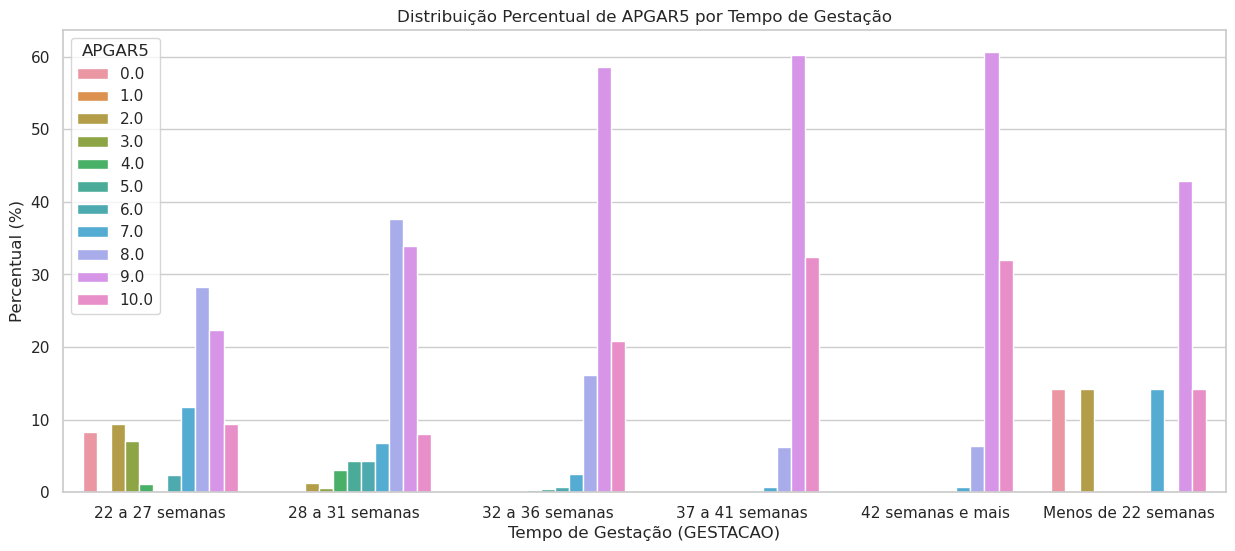

In [12]:
percentuais_linha_reset = percentuais_linha.reset_index()

percentuais_longa = percentuais_linha_reset.melt(id_vars='GESTACAO', var_name='APGAR5', value_name='Percentual')

plt.figure(figsize=(15, 6))
sns.barplot(data=percentuais_longa, x='GESTACAO', y='Percentual', hue='APGAR5')

plt.title('Distribuição Percentual de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação (GESTACAO)')
plt.ylabel('Percentual (%)')

plt.legend(title='APGAR5')
plt.show()


In [13]:
Aparentemente ha uma queda no apgar5 antes da 36 semana, o que e possivel notar pela brusca diminuição do 9 e aumento dos valores menores.
porem eu nao sei qual a correlação do apgar5 com prematuros, então nao tenho dados suficientes nem o conhecimento
para corroborar ou negar nada.

SyntaxError: invalid syntax (410656235.py, line 1)

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

/tmp/ipykernel_12654/3314535293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APGAR5['Faixa_Peso'] = pd.cut(APGAR5['PESO'], bins=bins, labels=labels)


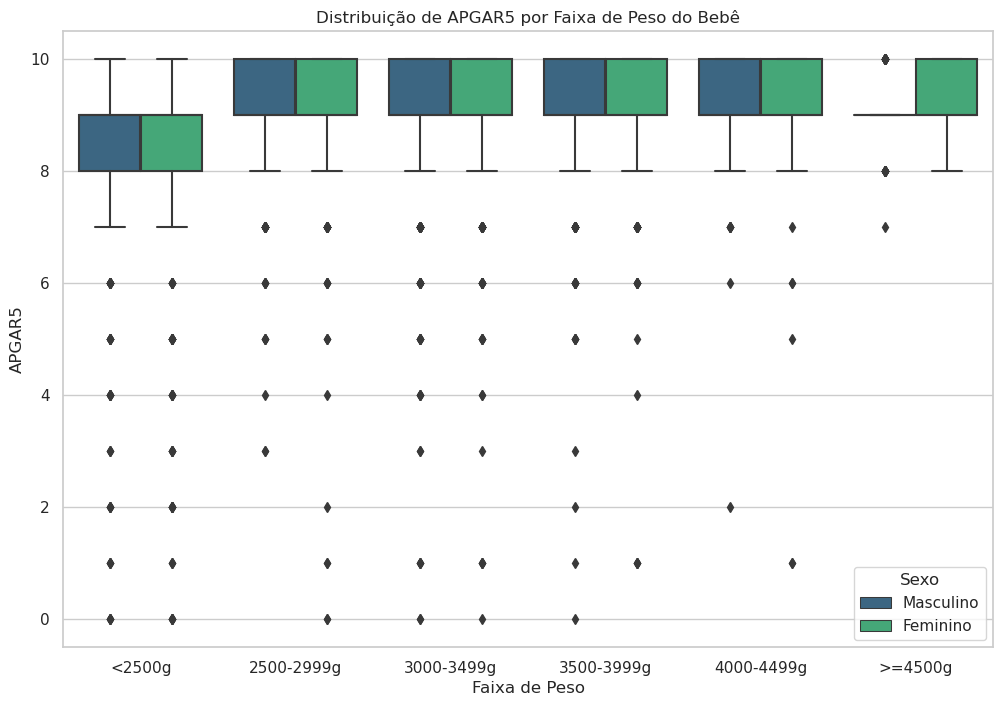

In [23]:
bins = [0, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ['<2500g', '2500-2999g', '3000-3499g', '3500-3999g', '4000-4499g', '>=4500g']
APGAR5['Faixa_Peso'] = pd.cut(APGAR5['PESO'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.boxplot(data=APGAR5, x='Faixa_Peso', y='APGAR5', hue='SEXO', palette='viridis')

plt.title('Distribuição de APGAR5 por Faixa de Peso do Bebê')
plt.xlabel('Faixa de Peso')
plt.ylabel('APGAR5')

plt.legend(title='Sexo')
plt.show()